## **`Human Presence Detection Using Machine Learning`**

`Importing libraries`

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from collections import Counter

`Loading the DataSets` - And **Reszing** them do that all are of same size

In [2]:
human_path = "../human detection dataset/1"
no_human_path = "../human detection dataset/0"

IMG_SIZE = 64
data = []
labels = []

In [3]:
def load_images(folder, label):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # grayscale
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            data.append(img.flatten())  # flatten to 1D vector
            labels.append(label)

load_images(human_path, 1)
load_images(no_human_path, 0)

X = np.array(data) / 255.0  # normalize
y = np.array(labels)

` Dataset Summary Plots`

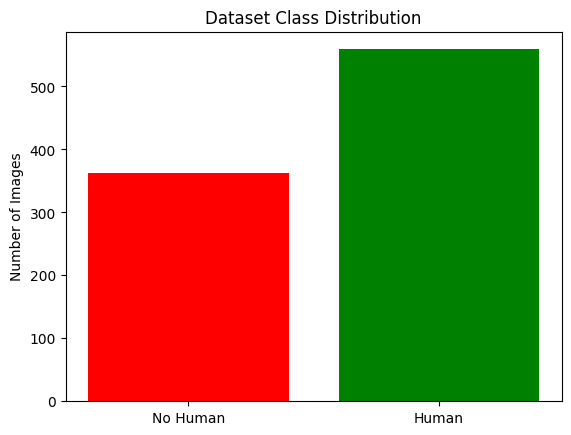

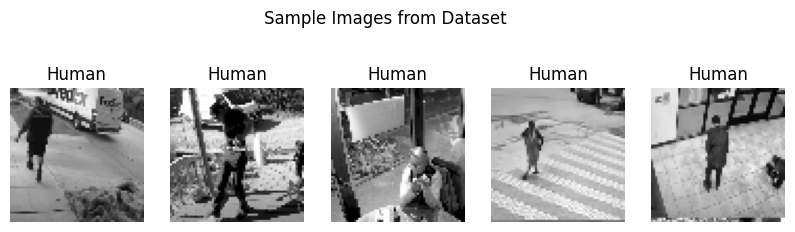

In [4]:
# Class distribution
counts = Counter(y)
plt.bar(["No Human", "Human"], [counts[0], counts[1]], color=['red', 'green'])
plt.title("Dataset Class Distribution")
plt.ylabel("Number of Images")
plt.show()

# Show sample images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    ax.set_title("Human" if y[i] == 1 else "No Human")
    ax.axis('off')
plt.suptitle("Sample Images from Dataset")
plt.show()


` Train-Test Split`

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

`Train the Model`

In [6]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


` Evaluation with Plots`

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.25      0.33        73
           1       0.63      0.83      0.72       112

    accuracy                           0.60       185
   macro avg       0.56      0.54      0.52       185
weighted avg       0.57      0.60      0.56       185



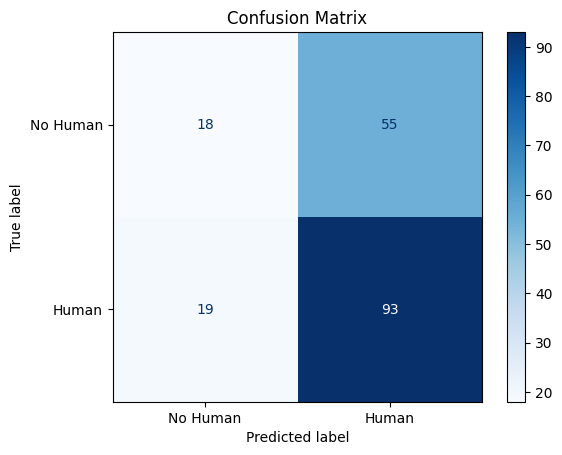

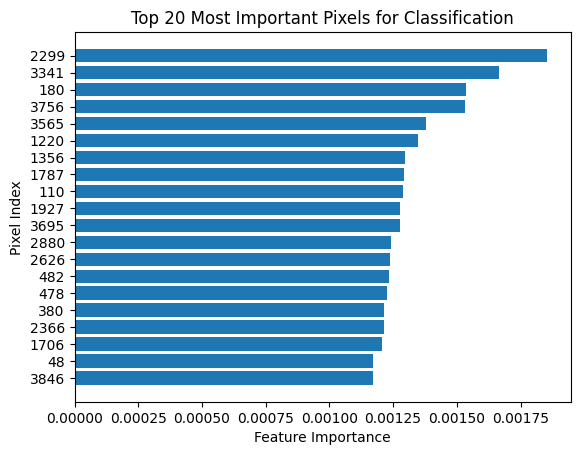

In [7]:
y_pred = clf.predict(X_test)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Human", "Human"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Feature importance (Top 20)
importances = clf.feature_importances_
indices = np.argsort(importances)[-20:]
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), indices)
plt.xlabel("Feature Importance")
plt.ylabel("Pixel Index")
plt.title("Top 20 Most Important Pixels for Classification")
plt.show()


`PCA Plot (Visualizing Data in 2D)`

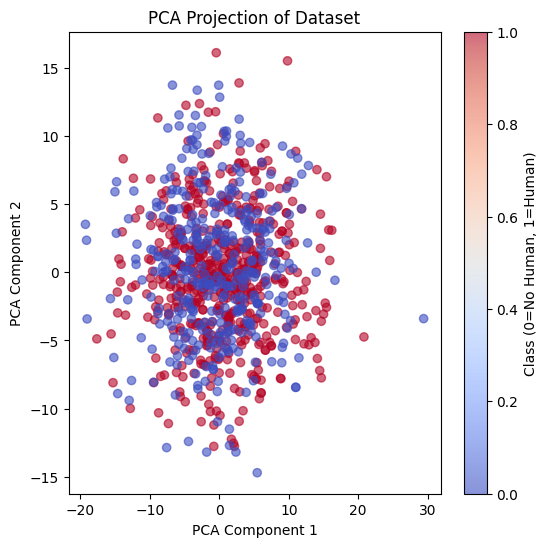

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(6,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', alpha=0.6)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Dataset")
plt.colorbar(label="Class (0=No Human, 1=Human)")
plt.show()


`Prediction Function`

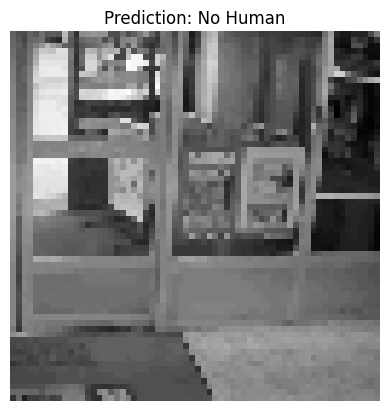

In [10]:
def predict_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.flatten().reshape(1, -1) / 255.0
    prediction = clf.predict(img)[0]
    plt.imshow(img.reshape(IMG_SIZE, IMG_SIZE), cmap='gray')
    plt.title("Prediction: Human" if prediction == 1 else "Prediction: No Human")
    plt.axis('off')
    plt.show()

predict_image("../human detection dataset/0/104.png")
